<a href="https://colab.research.google.com/github/sdf-works/sam-learns-ML/blob/main/nonlinear_wiggles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Wiggles, weren’t you about to propose a toast to your gallant captain?](https://morbotron.com/meme/S03E07/365180.jpg?b64lines=V2lnZ2xlcywgd2VyZW4ndCB5b3UKYWJvdXQgdG8gcHJvcG9zZSBhIHRvYXN0CnRvIHlvdXIgZ2FsbGFudCBjYXB0YWluPyA=)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

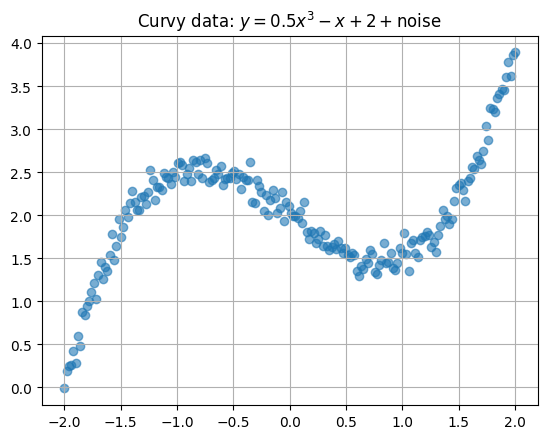

In [3]:
# Create x and y values
x = np.linspace(-2, 2, 200)
y = 0.5 * x**3 - x + 2 + 0.1 * np.random.randn(*x.shape)

# Convert to PyTorch tensors
x_tensor = torch.from_numpy(x).float().unsqueeze(1)
y_tensor = torch.from_numpy(y).float().unsqueeze(1)

# Plot it!
plt.scatter(x, y, alpha=0.6)
plt.title("Curvy data: $y = 0.5x^3 - x + 2 + \\text{noise}$")
plt.grid(True)
plt.show()

In [6]:
#regression

model = nn.Linear(in_features=1, out_features=1) #this is the y hat vector that learns slope and intercept

print("Initial weight:", model.weight.data)
print("Initial bias:", model.bias.data)

#model guess
y_hat = model(x_tensor)

print(y_hat[:5])

Initial weight: tensor([[-0.7342]])
Initial bias: tensor([0.1507])
tensor([[1.6191],
        [1.6044],
        [1.5896],
        [1.5748],
        [1.5601]], grad_fn=<SliceBackward0>)


In [9]:
#define loss function

criterion = nn.MSELoss()

# Forward pass
y_hat = model(x_tensor)
loss = criterion(y_hat, y_tensor)

# Set up optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Training step
loss.backward()
optimizer.step()
optimizer.zero_grad()

In [10]:
#training in a loop

num_epochs = 50
losses = []

snapshots = {}  # epoch → prediction
snapshot_epochs = [0, 10, 25, 50]

for epoch in range(num_epochs):
    # 1. Forward pass
    y_hat = model(x_tensor)

    # 2. Compute loss
    loss = criterion(y_hat, y_tensor)
    losses.append(loss.item())

    if epoch in snapshot_epochs:
     snapshots[epoch] = model(x_tensor).detach().numpy()

    # 3. Backward pass
    loss.backward()

    # 4. Update weights
    optimizer.step()

    # 5. Clear gradients
    optimizer.zero_grad()

    # 6. Print progress
    if epoch % 10 == 0 or epoch == num_epochs - 1:
        w = model.weight.data.item()
        b = model.bias.data.item()
        print(f"Epoch {epoch:3d} | Loss: {loss.item():.4f} | w: {w:.4f} | b: {b:.4f}")

Epoch   0 | Loss: 2.1421 | w: -0.1565 | b: 1.0578
Epoch  10 | Loss: 0.3996 | w: 0.1969 | b: 1.9073
Epoch  20 | Loss: 0.3828 | w: 0.2123 | b: 1.9985
Epoch  30 | Loss: 0.3826 | w: 0.2129 | b: 2.0083
Epoch  40 | Loss: 0.3826 | w: 0.2130 | b: 2.0094
Epoch  49 | Loss: 0.3826 | w: 0.2130 | b: 2.0095


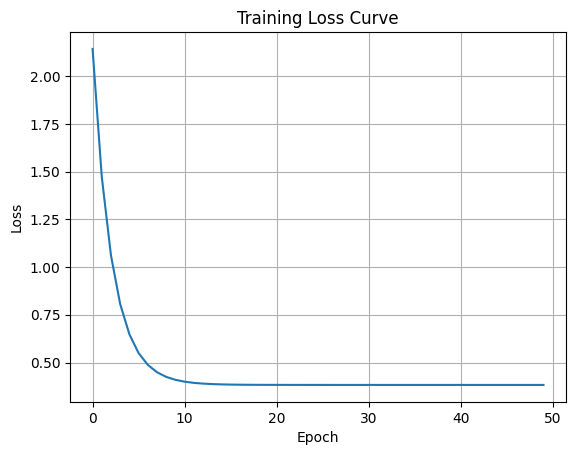

In [11]:
#plot loss curve

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.grid(True)
plt.show()

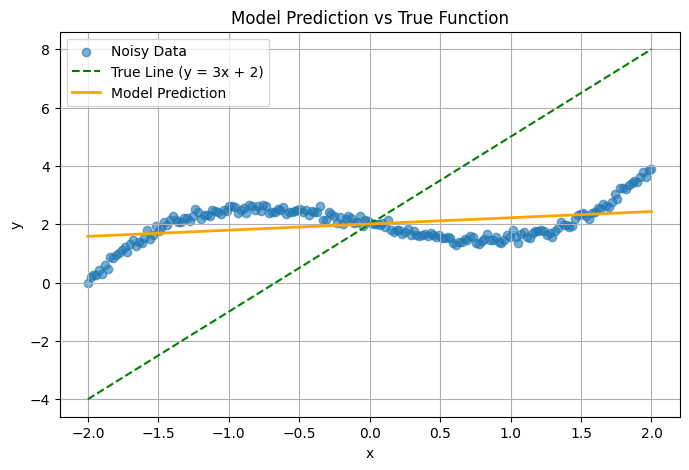

In [12]:
#plot model predictions vs data

# Get final predictions
y_hat = model(x_tensor).detach().numpy()
x_vals = x_tensor.numpy()
y_true = y_tensor.numpy()

y_true_line = 3 * x_vals + 2

# Plot everything
plt.figure(figsize=(8, 5))

plt.scatter(x_vals, y_true, label="Noisy Data", alpha=0.6)
plt.plot(x_vals, y_true_line, label="True Line (y = 3x + 2)", linestyle="--", color="green")
plt.plot(x_vals, y_hat, label="Model Prediction", color="orange", linewidth=2)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Model Prediction vs True Function")
plt.legend()
plt.grid(True)
plt.show()

In [18]:
#alright now to make it wiggle

model = nn.Sequential(
    nn.Linear(1, 16),
    nn.ReLU(),
    nn.Linear(16, 1)
)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

In [31]:
#training in a loop

num_epochs = 50
losses = []

snapshots = {}  # epoch → prediction
snapshot_epochs = [0, 10, 25, 50]

for epoch in range(num_epochs):
    # 1. Forward pass
    y_hat = model(x_tensor)

    # 2. Compute loss
    loss = criterion(y_hat, y_tensor)
    losses.append(loss.item())

    if epoch in snapshot_epochs:
     snapshots[epoch] = model(x_tensor).detach().numpy()

    # 3. Backward pass
    loss.backward()

    # 4. Update weights
    optimizer.step()

    # 5. Clear gradients
    optimizer.zero_grad()


y_final = model(x_tensor)
final_loss = criterion(y_final, y_tensor)
print(f"\nFinal model loss: {final_loss.item():.4f}")


Final model loss: 0.1167


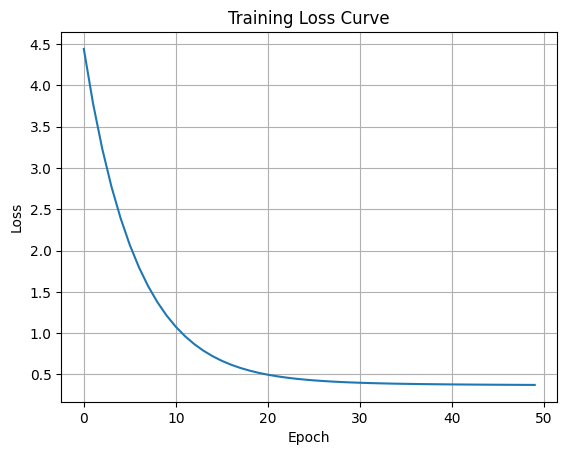

In [20]:
#plot loss curve

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.grid(True)
plt.show()

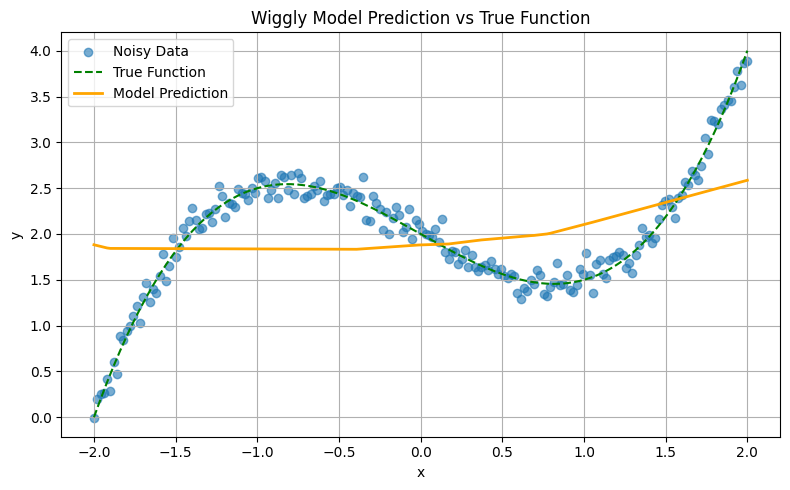

In [22]:
#plot model predictions vs data

# Get predictions and original data
x_vals = x_tensor.numpy()
y_true = y_tensor.numpy()
y_pred = model(x_tensor).detach().numpy()

# Optional: True underlying nonlinear function (customize this if needed)
y_true_line = 0.5 * x_vals**3 - x_vals + 2  # Example: if this is your real function

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(x_vals, y_true, label="Noisy Data", alpha=0.6)
plt.plot(x_vals, y_true_line, label="True Function", linestyle="--", color="green")
plt.plot(x_vals, y_pred, label="Model Prediction", color="orange", linewidth=2)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Wiggly Model Prediction vs True Function")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Final model loss: 0.4397


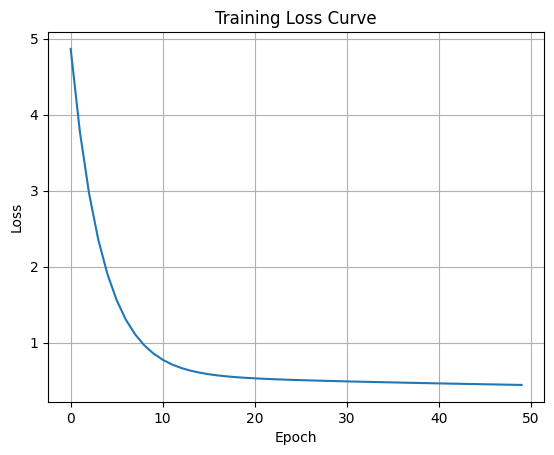

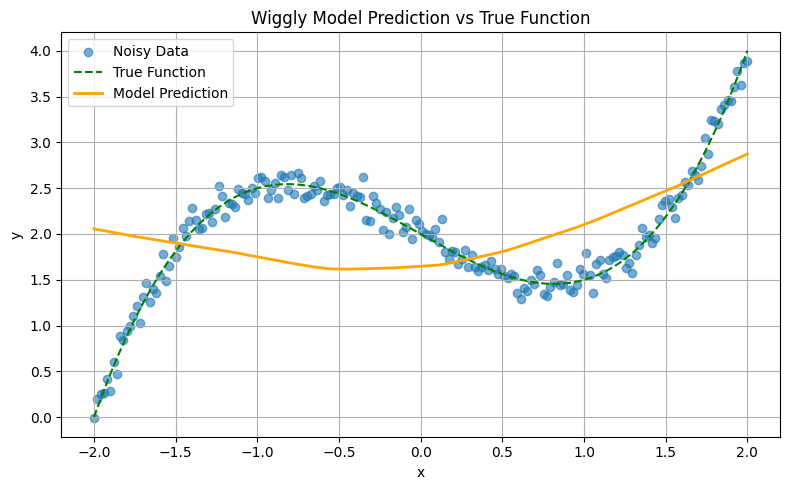

In [33]:
#alright now to make it wiggle MOREEEE

model = nn.Sequential(
    nn.Linear(1, 32),  #more units = more wiggle capacity
    nn.ReLU(),
    nn.Linear(32, 1)
)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

#training in a loop

num_epochs = 50
losses = []

snapshots = {}  # epoch → prediction
snapshot_epochs = [0, 10, 25, 50]

for epoch in range(num_epochs):
    # 1. Forward pass
    y_hat = model(x_tensor)

    # 2. Compute loss
    loss = criterion(y_hat, y_tensor)
    losses.append(loss.item())

    if epoch in snapshot_epochs:
     snapshots[epoch] = model(x_tensor).detach().numpy()

    # 3. Backward pass
    loss.backward()

    # 4. Update weights
    optimizer.step()

    # 5. Clear gradients
    optimizer.zero_grad()

y_final = model(x_tensor)
final_loss = criterion(y_final, y_tensor)
print(f"\nFinal model loss: {final_loss.item():.4f}")


#plot loss curve

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.grid(True)
plt.show()


#plot model predictions vs data

# Get predictions and original data
x_vals = x_tensor.numpy()
y_true = y_tensor.numpy()
y_pred = model(x_tensor).detach().numpy()

# Optional: True underlying nonlinear function (customize this if needed)
y_true_line = 0.5 * x_vals**3 - x_vals + 2  # Example: if this is your real function

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(x_vals, y_true, label="Noisy Data", alpha=0.6)
plt.plot(x_vals, y_true_line, label="True Function", linestyle="--", color="green")
plt.plot(x_vals, y_pred, label="Model Prediction", color="orange", linewidth=2)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Wiggly Model Prediction vs True Function")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Final model loss: 0.1550


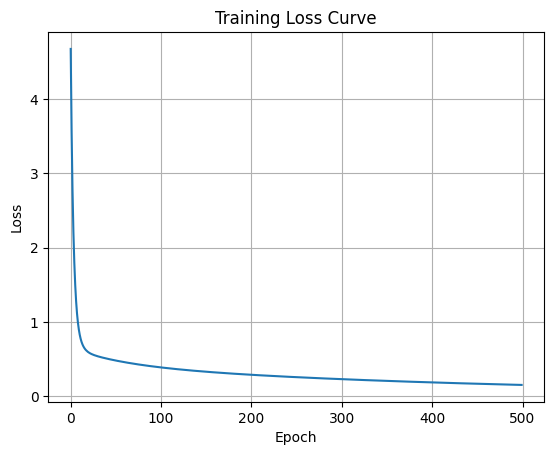

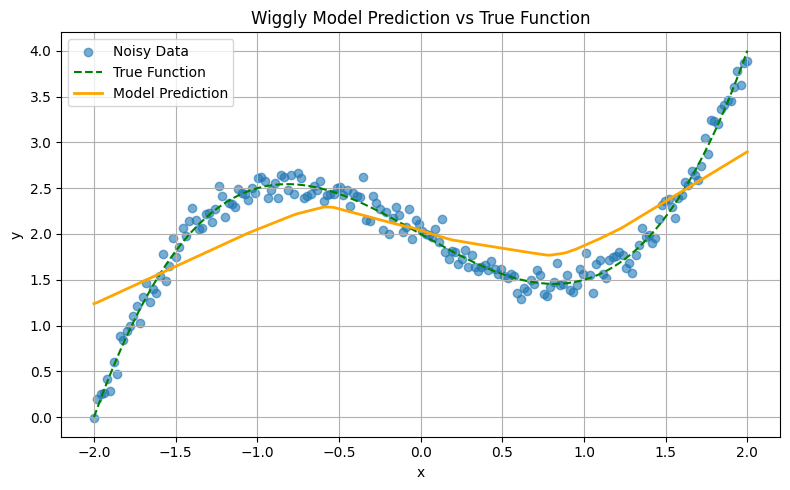

In [34]:
#alright now to make it wiggle more more

model = nn.Sequential(
    nn.Linear(1, 32),
    nn.ReLU(),
    nn.Linear(32, 1)
)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

#training in a loop

num_epochs = 500 #increased time steps for more learning
losses = []

snapshots = {}  # epoch → prediction
snapshot_epochs = [0, 10, 25, 50]

for epoch in range(num_epochs):
    # 1. Forward pass
    y_hat = model(x_tensor)

    # 2. Compute loss
    loss = criterion(y_hat, y_tensor)
    losses.append(loss.item())

    if epoch in snapshot_epochs:
     snapshots[epoch] = model(x_tensor).detach().numpy()

    # 3. Backward pass
    loss.backward()

    # 4. Update weights
    optimizer.step()

    # 5. Clear gradients
    optimizer.zero_grad()

y_final = model(x_tensor)
final_loss = criterion(y_final, y_tensor)
print(f"\nFinal model loss: {final_loss.item():.4f}")

#plot loss curve

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.grid(True)
plt.show()


#plot model predictions vs data

# Get predictions and original data
x_vals = x_tensor.numpy()
y_true = y_tensor.numpy()
y_pred = model(x_tensor).detach().numpy()

# Optional: True underlying nonlinear function (customize this if needed)
y_true_line = 0.5 * x_vals**3 - x_vals + 2  # Example: if this is your real function

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(x_vals, y_true, label="Noisy Data", alpha=0.6)
plt.plot(x_vals, y_true_line, label="True Function", linestyle="--", color="green")
plt.plot(x_vals, y_pred, label="Model Prediction", color="orange", linewidth=2)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Wiggly Model Prediction vs True Function")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Final model loss: 0.1443


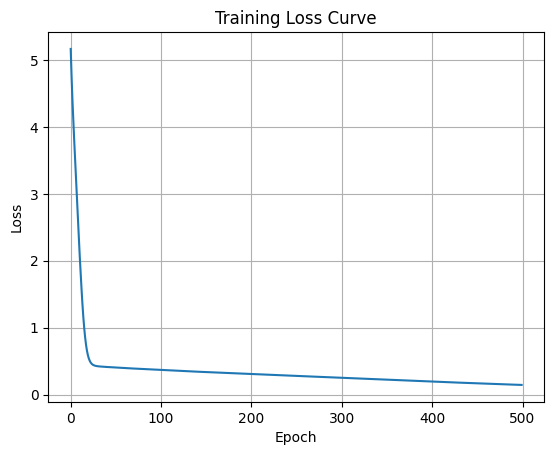

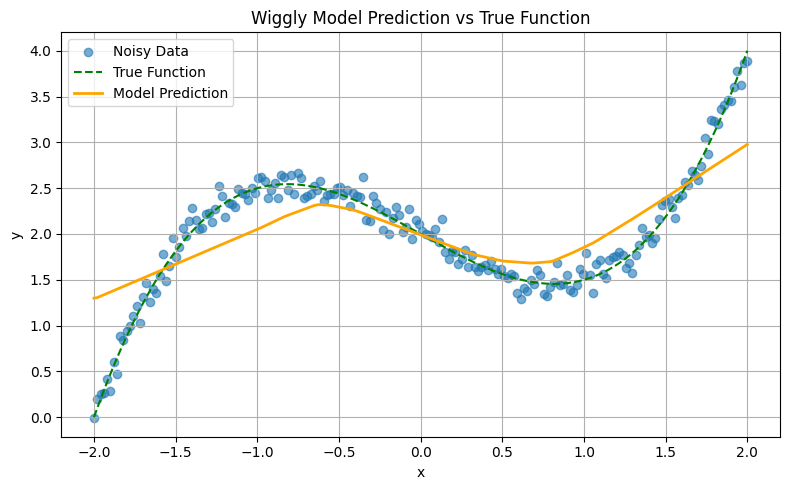

In [35]:
#add some layers to add some wiggle

model = nn.Sequential(
    nn.Linear(1, 32),   # First hidden layer
    nn.ReLU(),
    nn.Linear(32, 16),  # Second hidden layer
    nn.ReLU(),
    nn.Linear(16, 1)    # Output layer
)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

#training in a loop

num_epochs = 500 #increased time steps for more learning
losses = []

snapshots = {}  # epoch → prediction
snapshot_epochs = [0, 10, 25, 50]

for epoch in range(num_epochs):
    # 1. Forward pass
    y_hat = model(x_tensor)

    # 2. Compute loss
    loss = criterion(y_hat, y_tensor)
    losses.append(loss.item())

    if epoch in snapshot_epochs:
     snapshots[epoch] = model(x_tensor).detach().numpy()

    # 3. Backward pass
    loss.backward()

    # 4. Update weights
    optimizer.step()

    # 5. Clear gradients
    optimizer.zero_grad()

y_final = model(x_tensor)
final_loss = criterion(y_final, y_tensor)
print(f"\nFinal model loss: {final_loss.item():.4f}")

#plot loss curve

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.grid(True)
plt.show()


#plot model predictions vs data

# Get predictions and original data
x_vals = x_tensor.numpy()
y_true = y_tensor.numpy()
y_pred = model(x_tensor).detach().numpy()

# Optional: True underlying nonlinear function (customize this if needed)
y_true_line = 0.5 * x_vals**3 - x_vals + 2  # Example: if this is your real function

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(x_vals, y_true, label="Noisy Data", alpha=0.6)
plt.plot(x_vals, y_true_line, label="True Function", linestyle="--", color="green")
plt.plot(x_vals, y_pred, label="Model Prediction", color="orange", linewidth=2)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Wiggly Model Prediction vs True Function")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Final model loss: 0.2528


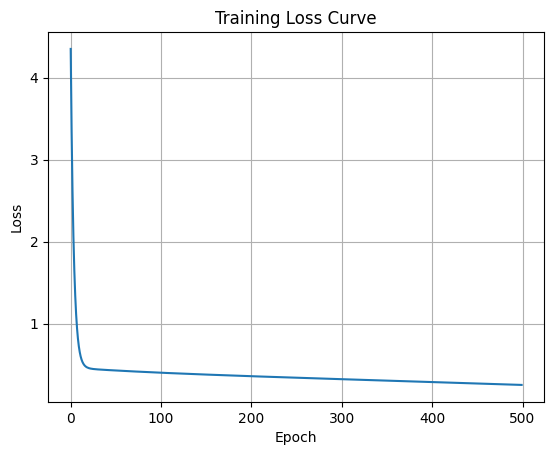

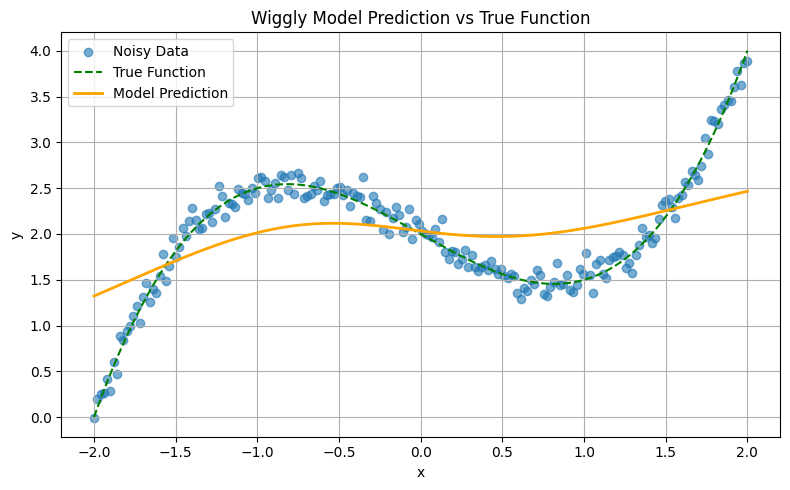

In [36]:
#single layer but different function

model = nn.Sequential(
    nn.Linear(1, 32),
    nn.Tanh(),
    nn.Linear(32, 1)
)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

#training in a loop

num_epochs = 500 #increased time steps for more learning
losses = []

snapshots = {}  # epoch → prediction
snapshot_epochs = [0, 10, 25, 50]

for epoch in range(num_epochs):
    # 1. Forward pass
    y_hat = model(x_tensor)

    # 2. Compute loss
    loss = criterion(y_hat, y_tensor)
    losses.append(loss.item())

    if epoch in snapshot_epochs:
     snapshots[epoch] = model(x_tensor).detach().numpy()

    # 3. Backward pass
    loss.backward()

    # 4. Update weights
    optimizer.step()

    # 5. Clear gradients
    optimizer.zero_grad()

y_final = model(x_tensor)
final_loss = criterion(y_final, y_tensor)
print(f"\nFinal model loss: {final_loss.item():.4f}")

#plot loss curve

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.grid(True)
plt.show()


#plot model predictions vs data

# Get predictions and original data
x_vals = x_tensor.numpy()
y_true = y_tensor.numpy()
y_pred = model(x_tensor).detach().numpy()

# Optional: True underlying nonlinear function (customize this if needed)
y_true_line = 0.5 * x_vals**3 - x_vals + 2  # Example: if this is your real function

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(x_vals, y_true, label="Noisy Data", alpha=0.6)
plt.plot(x_vals, y_true_line, label="True Function", linestyle="--", color="green")
plt.plot(x_vals, y_pred, label="Model Prediction", color="orange", linewidth=2)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Wiggly Model Prediction vs True Function")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Final model loss: 0.2440


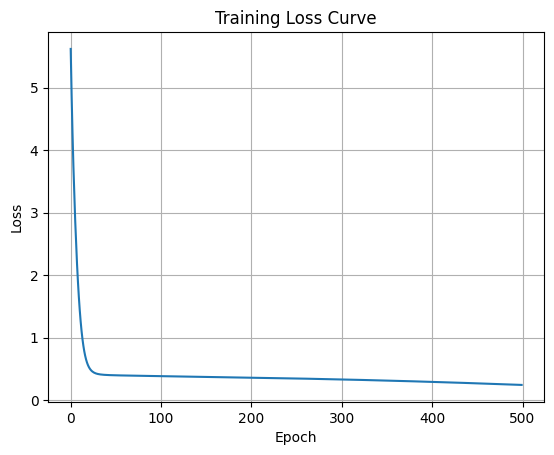

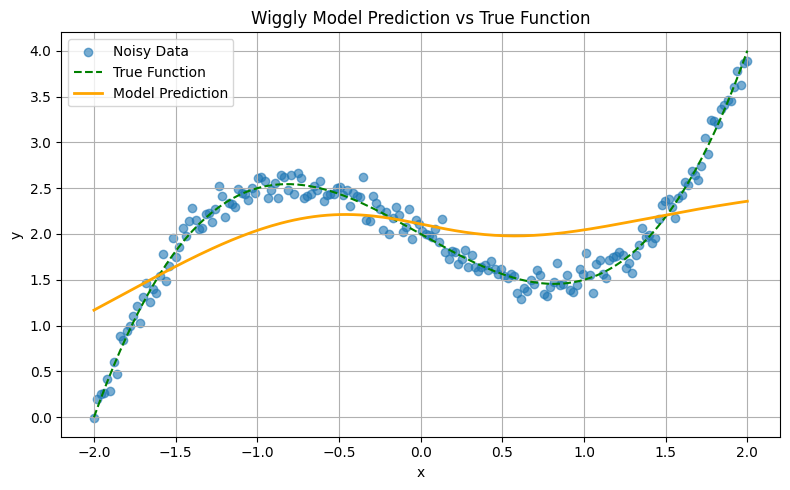

In [37]:
#wiggly function and lasagna

model = nn.Sequential(
    nn.Linear(1, 32),
    nn.Tanh(),
    nn.Linear(32, 16),
    nn.Tanh(),
    nn.Linear(16, 1)
)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

#training in a loop

num_epochs = 500 #increased time steps for more learning
losses = []

snapshots = {}  # epoch → prediction
snapshot_epochs = [0, 10, 25, 50]

for epoch in range(num_epochs):
    # 1. Forward pass
    y_hat = model(x_tensor)

    # 2. Compute loss
    loss = criterion(y_hat, y_tensor)
    losses.append(loss.item())

    if epoch in snapshot_epochs:
     snapshots[epoch] = model(x_tensor).detach().numpy()

    # 3. Backward pass
    loss.backward()

    # 4. Update weights
    optimizer.step()

    # 5. Clear gradients
    optimizer.zero_grad()

y_final = model(x_tensor)
final_loss = criterion(y_final, y_tensor)
print(f"\nFinal model loss: {final_loss.item():.4f}")

#plot loss curve

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.grid(True)
plt.show()


#plot model predictions vs data

# Get predictions and original data
x_vals = x_tensor.numpy()
y_true = y_tensor.numpy()
y_pred = model(x_tensor).detach().numpy()

# Optional: True underlying nonlinear function (customize this if needed)
y_true_line = 0.5 * x_vals**3 - x_vals + 2  # Example: if this is your real function

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(x_vals, y_true, label="Noisy Data", alpha=0.6)
plt.plot(x_vals, y_true_line, label="True Function", linestyle="--", color="green")
plt.plot(x_vals, y_pred, label="Model Prediction", color="orange", linewidth=2)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Wiggly Model Prediction vs True Function")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Final model loss: 0.0152


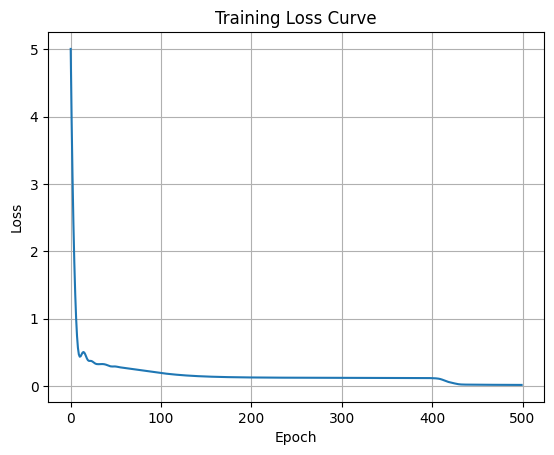

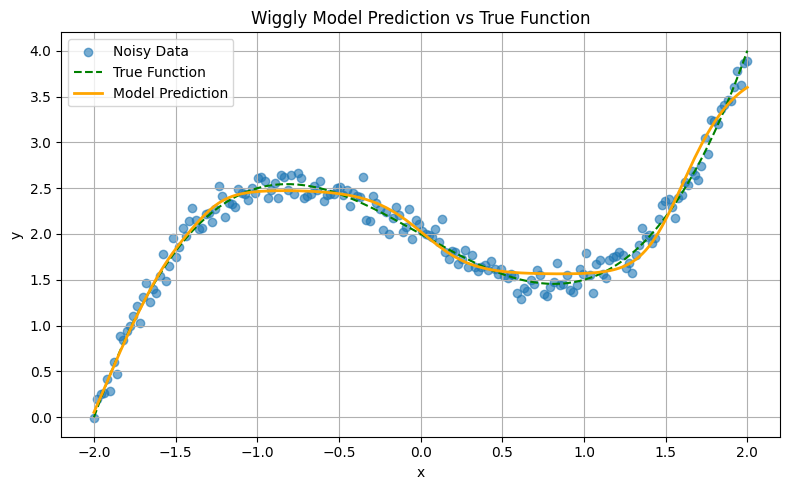

In [38]:
#adventures in fitting
#wiggly function and lasagna

model = nn.Sequential(
    nn.Linear(1, 32),
    nn.Tanh(),
    nn.Linear(32, 16),
    nn.Tanh(),
    nn.Linear(16, 1)
)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01) #using a different optimizer
criterion = nn.MSELoss()

#training in a loop

num_epochs = 500 #increased time steps for more learning
losses = []

snapshots = {}  # epoch → prediction
snapshot_epochs = [0, 10, 25, 50]

for epoch in range(num_epochs):
    # 1. Forward pass
    y_hat = model(x_tensor)

    # 2. Compute loss
    loss = criterion(y_hat, y_tensor)
    losses.append(loss.item())

    if epoch in snapshot_epochs:
     snapshots[epoch] = model(x_tensor).detach().numpy()

    # 3. Backward pass
    loss.backward()

    # 4. Update weights
    optimizer.step()

    # 5. Clear gradients
    optimizer.zero_grad()

y_final = model(x_tensor)
final_loss = criterion(y_final, y_tensor)
print(f"\nFinal model loss: {final_loss.item():.4f}")

#plot loss curve

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.grid(True)
plt.show()


#plot model predictions vs data

# Get predictions and original data
x_vals = x_tensor.numpy()
y_true = y_tensor.numpy()
y_pred = model(x_tensor).detach().numpy()

# Optional: True underlying nonlinear function (customize this if needed)
y_true_line = 0.5 * x_vals**3 - x_vals + 2  # Example: if this is your real function

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(x_vals, y_true, label="Noisy Data", alpha=0.6)
plt.plot(x_vals, y_true_line, label="True Function", linestyle="--", color="green")
plt.plot(x_vals, y_pred, label="Model Prediction", color="orange", linewidth=2)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Wiggly Model Prediction vs True Function")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



## 🧠 Fitting Nonlinear Functions with Neural Networks

### ✨ Goal
Explore how increasing model complexity allows us to fit nonlinear data — moving from a basic linear regression to a multi-layer neural network.

---

### 🔍 Problem Setup

We generated noisy data based on a simple nonlinear function:

`y = 3 * x + 2 + sin(5x) + noise`

The `sin(5x)` introduces wiggle — a nonlinear component that a linear model can't capture.

---

### 🧪 Models Tried

| Model              | Activation | Depth           | Optimizer | Notes                       |
|-------------------|------------|------------------|-----------|-----------------------------|
| Linear             | None       | 1 layer          | SGD       | Severely underfit           |
| ReLU               | ReLU       | 1 hidden layer   | SGD       | Too sharp — limited gains   |
| Tanh               | Tanh       | 1 hidden layer   | SGD       | Smooth but slow to improve  |
| **Tanh + Lasagna** | Tanh       | 3 layers         | **Adam**  | ⭐ Best performer so far!    |

---

### ⚙️ Final Model

```python
model = nn.Sequential(
    nn.Linear(1, 32),
    nn.Tanh(),
    nn.Linear(32, 16),
    nn.Tanh(),
    nn.Linear(16, 1)
)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
